# Cas pratique en Python 

Après avoir vu la théorie : place à la pratique ! 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# 1. Création du jeu de données 

Créez une fonction qui génère un dataset avec une variable X et une variable y avec un bruit aléatoire. 

In [2]:
def generate_dataset(n_samples=50, intercept=3, slope=5): 
    """ 
    Parameters: 
        - n_samples : nombre de points dans le jeu de données
        - intercept : ordonnée à l'origine
        - slope : pente

    Returns: 
        - X : np.array, variable explicative (par exemple on peut prendre un 
        espacement régulier de floats entre 0 et 30)
        - y : np.array, variable à expliquer (combinaison linéaire de X, avec un
        bruit gaussien)
    """

      # génération de données synthétiques
    np.random.seed(42)
    X = np.linspace(1, 10, n_samples).reshape(-1, 1)

    # on ajoute un bruit gaussien aux données
    # ce bruit correspond à des variations aléatoires (arbres d'essences différentes,
    # erreurs de mesure, etc.  )
    noise = np.random.normal(0, scale=3, size=n_samples)
    
    y = slope * X.flatten() + intercept + noise

    return X, y


Affichez le dataset sous forme de scatterplot

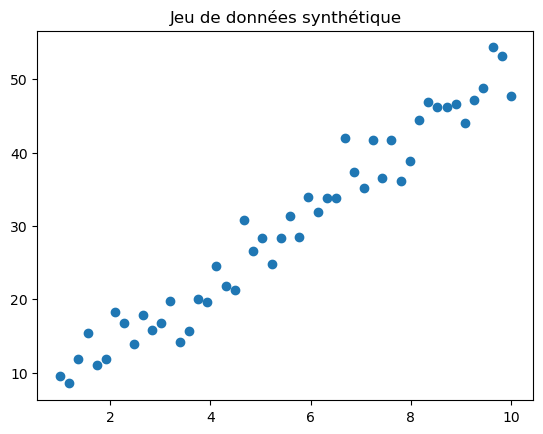

In [4]:
X, y = generate_dataset()

plt.scatter(X, y)
plt.title("Jeu de données synthétique");

# 2. Résolution analytique

Créer une fonction qui calcule le meilleur jeu de paramètres en utilisant la résolution analytique. 

On rappelle que les valeurs qui annulent la dérivée de la MSE sont : 

$$
a = \frac{\text{Cov}(X, Y)}{\text{Var}(X)} = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^N (x_i - \bar{x})^2}\\ \text{et} \\
b = \bar{y} - a \cdot \bar{x}
$$

In [5]:
def analytical_resolution(X, y):
    """
    Parameters : 
        - X : design matrix (1D array-like)
        - y : target (1D array-like)

    Returns : 
        - a : float, pente
        - b : float, ordonnée à l'origine
    """
    X = np.array(X).flatten()
    y = np.array(y).flatten()

    x_mean = np.mean(X)
    y_mean = np.mean(y)

    numerator = np.sum((X - x_mean) * (y - y_mean))   # Covariance
    denominator = np.sum((X - x_mean) ** 2)          # Variance

    a = numerator / denominator
    b = y_mean - a * x_mean

    return a, b

Compléter le graphique précédent en faisant apparaître la droite de régression 

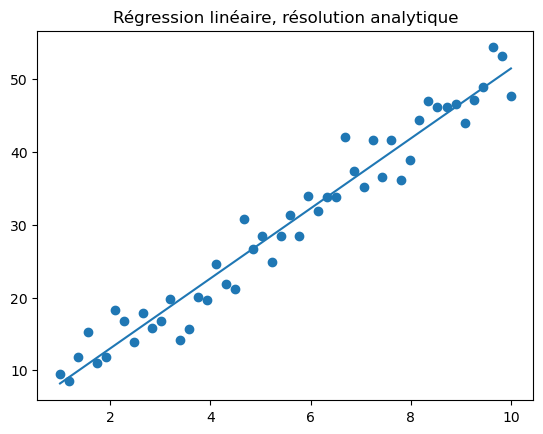

In [8]:
a, b = analytical_resolution(X, y)
y_hat_analytical = a * X + b
plt.scatter(X, y)
plt.plot(X, y_hat_analytical)
plt.title("Régression linéaire, résolution analytique");

# 2. Résolution algébrique 

Créer une fonction qui trouve le meilleur jeu de paramètres en utilisant la méthode algébrique. 

On rappelle que la projection orthogonale de Y sur l'espace engendré par les colonnes de X permet de trouver : 

$$
\hat{\beta} = (X^T \cdot X)^{-1} \cdot X
^T \cdot Y
$$


NB : n'oubliez pas d'ajouter la colonne de 1, qui correspond au paramètre de l'ordonnée à l'origine.

In [19]:
def algebraic_resolution(X, y):
    """
    Parameters : 
        - X : design matrix
        - y : target

    Return : 
        - a : int, pente
        - b : int, ordonnée à l'origine
    """
    # ajout de la colonne de 1 pour l'intercept
    X = np.hstack([np.ones((X.shape[0], 1)), X])


    # Résolution analytique : beta = (X^T X)^(-1) X^T y
    # .T correspond à la transposée
    # @ à la multiplication matricielle
    XtX = X.T @ X
    Xty = X.T @ y
    beta = np.linalg.pinv(XtX) @ Xty  # pseudo-inverse pour la stabilité

    return beta[1], beta[0]

Compléter le scatter plot en faisant apparaître la droite de régression obtenue.

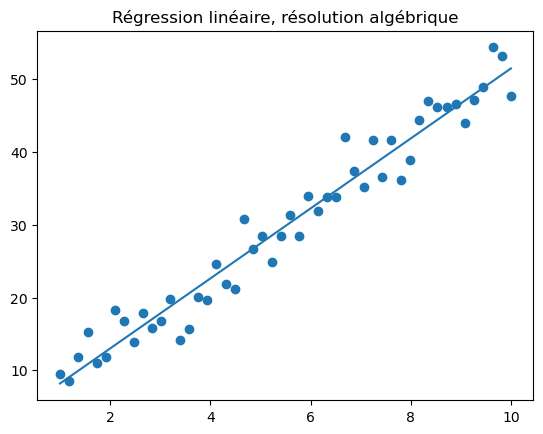

In [21]:
a, b = algebraic_resolution(X, y)
y_hat_algebraic = a * X + b 
plt.scatter(X, y)
plt.plot(X, y_hat_algebraic)
plt.title("Régression linéaire, résolution algébrique");

# 3. Descente de gradient 


Implémenter un algorithme de descente de gradient. 


On donne le pseudo-code associé : 

<p align="center">
  <img src="./img/gradient_descent.png" alt="plot" width="50%"/>
</p>

In [ ]:
def gradient_mse(X, y, a, b):
    """
    Gradient de la fonction de coût MSE évalué au point (a, b).

    Parameters :
        - X : array-like, features
        - y : array-like, target
        - a : float, pente
        - b : float, ordonnée à l'origine
        
    Returns: 
        - d_mse_d_a : float, dérivée par rapport à a
        - d_mse_d_b : float, dérivée par rapport à b 
    """
    N = len(y)
    y_pred = a * X + b
    error = y - y_pred

    d_mse_d_a = (-2 / N) * np.sum(X * error)
    d_mse_d_b = (-2 / N) * np.sum(error)

    return d_mse_d_a, d_mse_d_b

def gradient_descent(derivative, X, y, initial_condition=(0, 0), lr=0.01, n=1000):
    """
    Applique l'algorithme de descente de gradient à la MSE.

    Parameters:
        - derivative (function) : gradient de la fonction de coût
        - X : array-like, features
        - y : array-like, target
        - initial_condition (tuple) : (a0, b0)
        - lr (float) : learning rate
        - n (int) : nombre d'itérations

    Returns:
        - iteration_history (list) : liste des coordonnées (a, b) à chaque itération
        - derivation_history (list) : valeurs du gradient à chaque itération
    """
    a, b = initial_condition
    iteration_history = [(a, b)]
    derivation_history = []

    for _ in range(n):
        d_a, d_b = derivative(X, y, a, b)
        a -= lr * d_a
        b -= lr * d_b

        iteration_history.append((a, b))
        derivation_history.append((d_a, d_b))

    return iteration_history, derivation_history

## Diagnostic

Affichez dans un seul plot (plt.subplots) : 

- l'évolution de la norme du gradient
- l'évolution de la position en x de la particule
- l'évolution de la position en y de la particule

Tester différentes valeurs d'hyperparamètres jusqu'à atteindre la convergence.

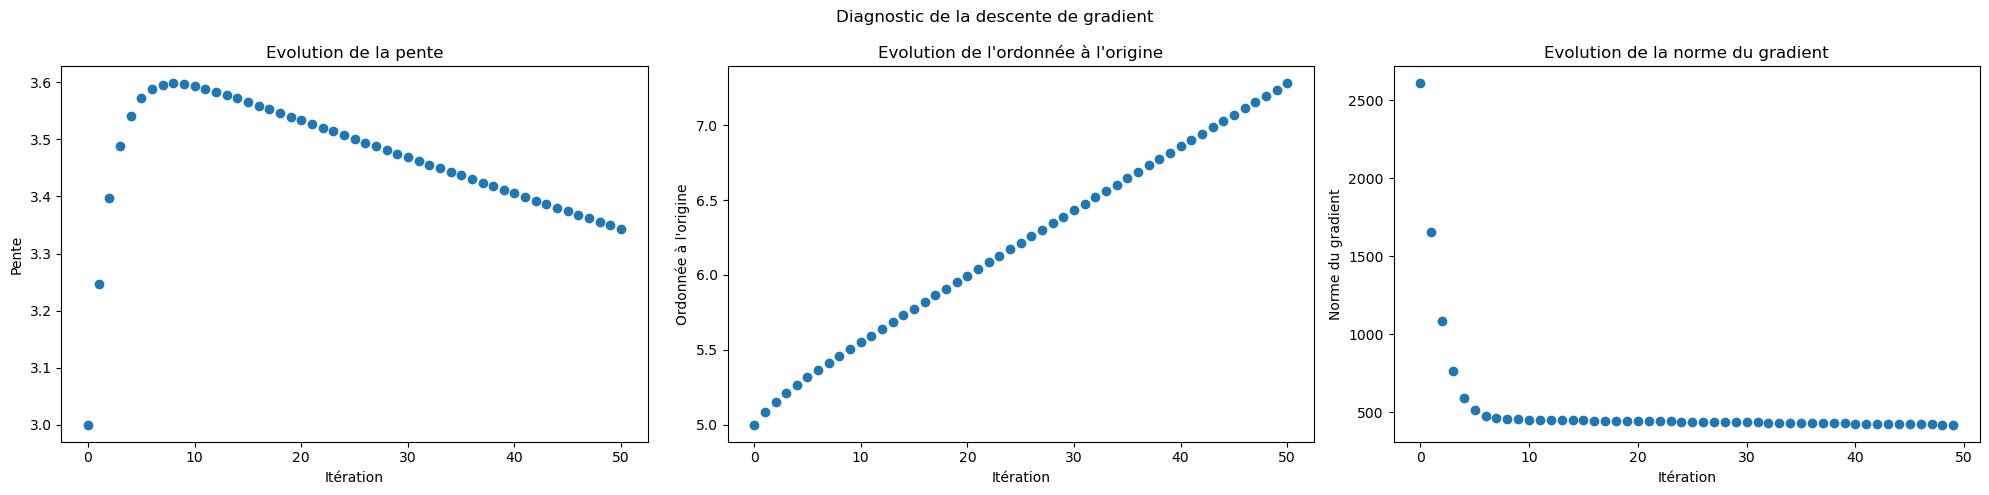

In [51]:
n_iter = 50
lr = 0.0001

iteration_history, derivation_history = gradient_descent(
        gradient_mse, X, y, initial_condition=(3, 5), lr=lr, n=n_iter
    )

a_history = [pos[0] for pos in iteration_history]
b_history = [pos[1] for pos in iteration_history]
gradient_norm_history =  [np.linalg.norm(g) for g in derivation_history]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(range(n_iter+1), a_history)
axs[0].set_xlabel("Itération")
axs[0].set_ylabel("Pente")
axs[0].set_title("Evolution de la pente")

axs[1].scatter(range(n_iter+1), b_history)
axs[1].set_xlabel("Itération")
axs[1].set_ylabel("Ordonnée à l'origine")
axs[1].set_title("Evolution de l'ordonnée à l'origine")

axs[2].scatter(range(n_iter), gradient_norm_history)
axs[2].set_xlabel("Itération")
axs[2].set_ylabel("Norme du gradient")
axs[2].set_title("Evolution de la norme du gradient")

plt.suptitle("Diagnostic de la descente de gradient")
plt.tight_layout()


Compléter le scatter plot en faisant apparaître la droite de régression obtenue.

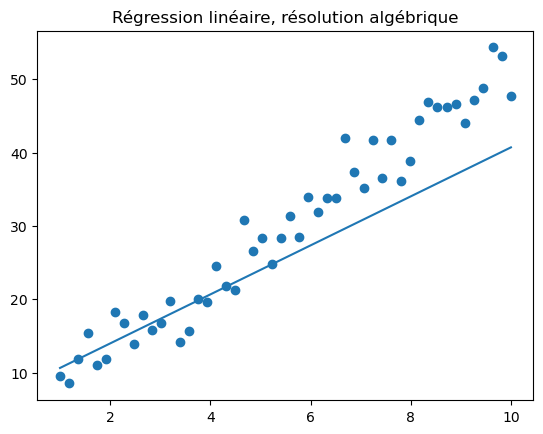

In [52]:
a_hat, b_hat = a_history[-1], b_history[-1]
y_hat_algo = a_hat * X + b_hat

plt.scatter(X, y)
plt.plot(X, y_hat_algo)
plt.title("Régression linéaire, résolution algébrique");